In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

In [11]:
#loading the data set

file_paath = '/home/ichigo/Desktop/Medical diagnosis uisng AI/Diseases_dataset/Liver_disease_data.csv'
data = pd.read_csv(file_paath)

In [12]:

# Check for missing values or implausible data
print(data.isnull().sum())  
data = data[(data['BMI'] > 0) & (data['LiverFunctionTest'] > 0)]  

Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64


In [13]:
# Features and target
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

In [14]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
# Save the scaler
with open('liver_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

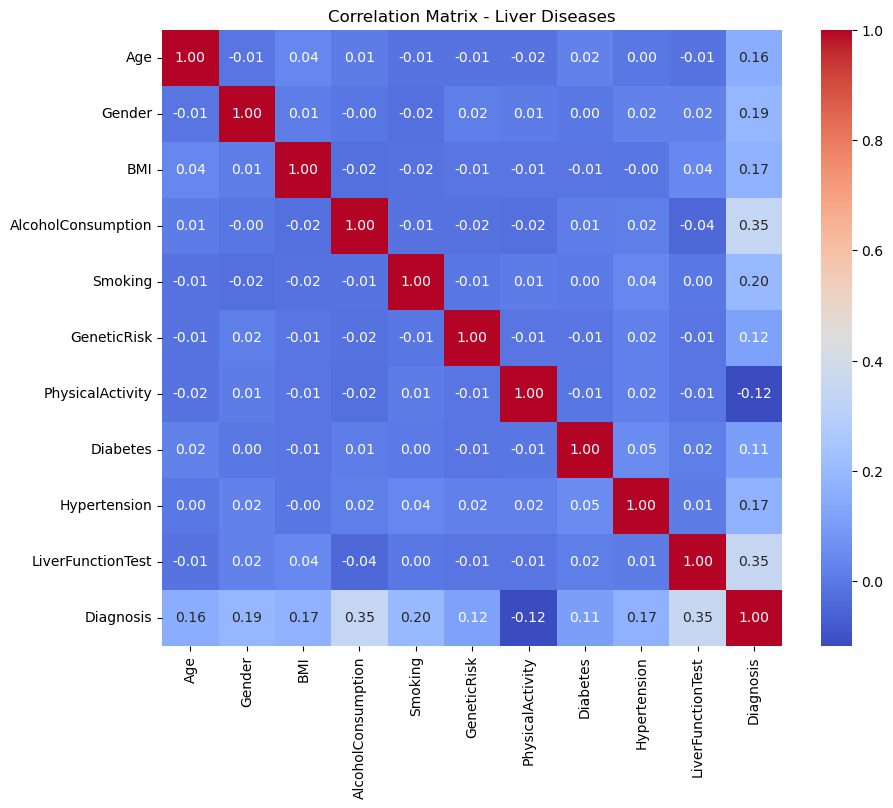

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix - Liver Diseases")
plt.show()


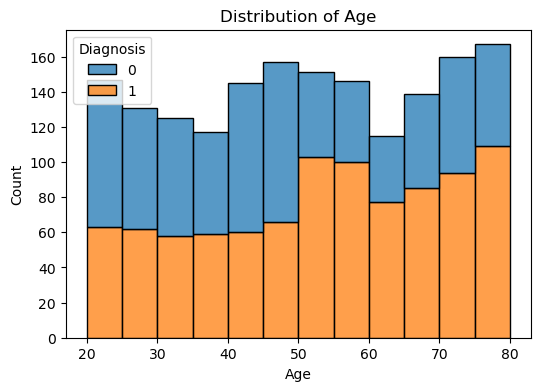

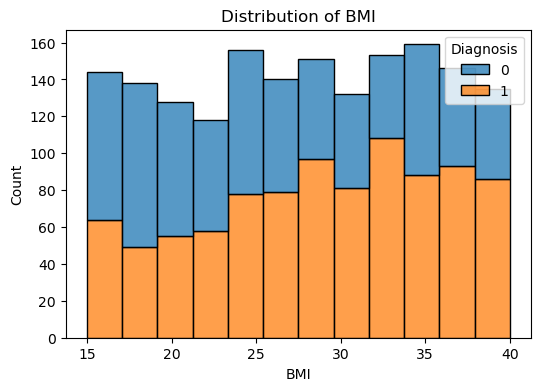

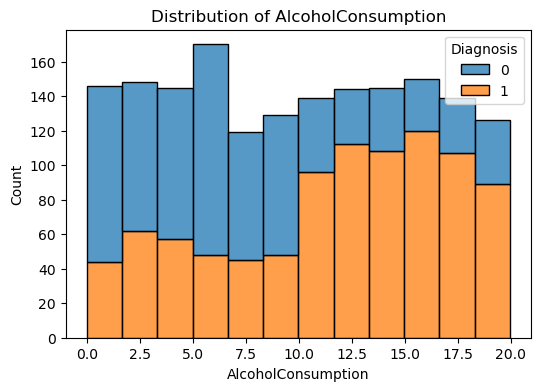

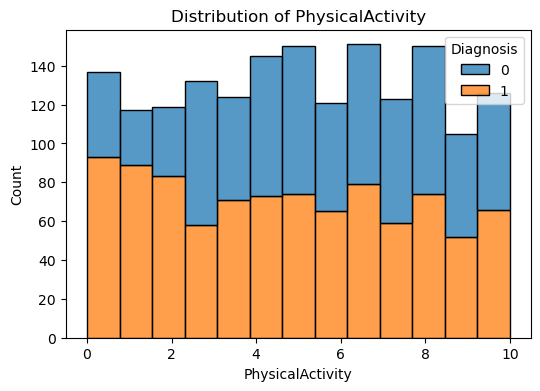

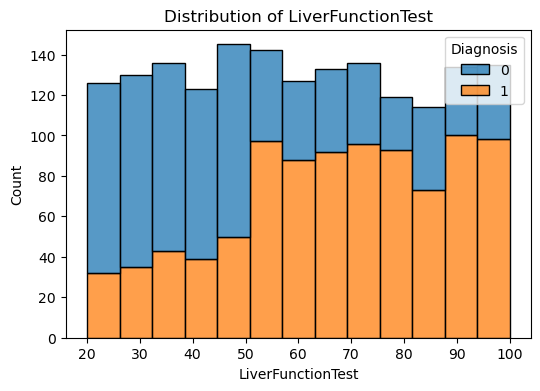

In [18]:
# Histograms
continuous_features = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'LiverFunctionTest']
for col in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x=col, hue='Diagnosis', multiple='stack')
    plt.title(f'Distribution of {col}')
    plt.show()

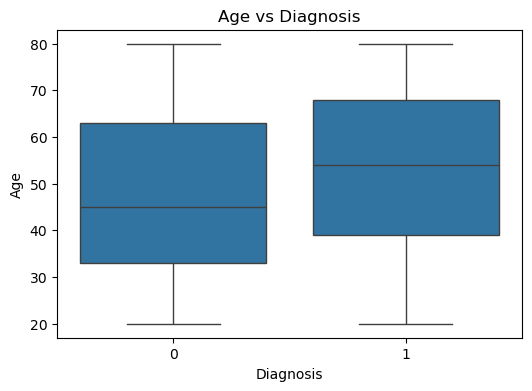

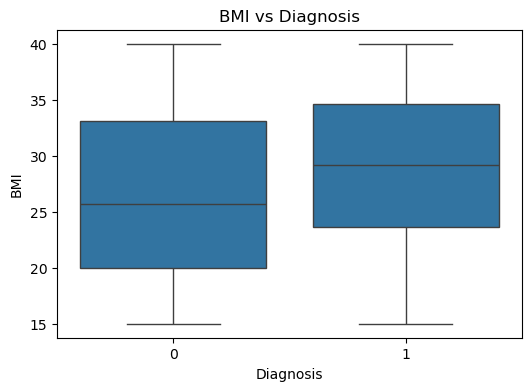

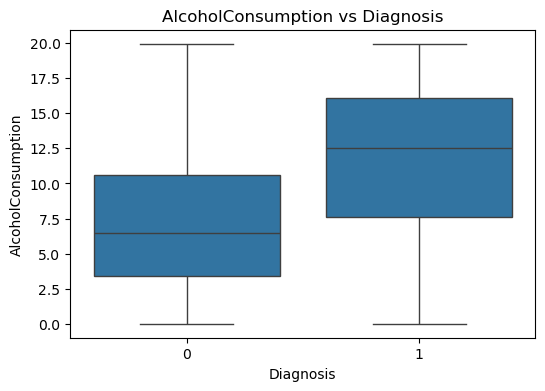

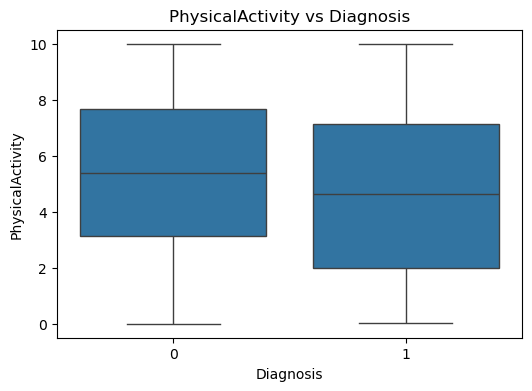

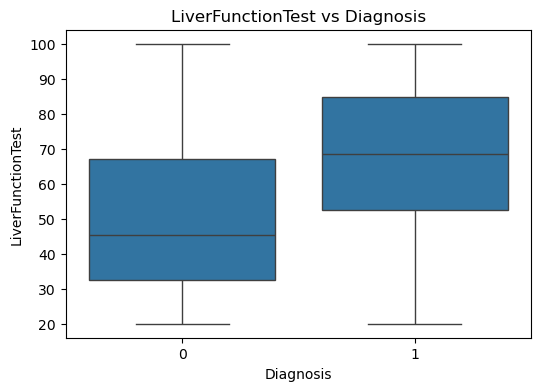

In [19]:
# Box plots
for col in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Diagnosis', y=col, data=data)
    plt.title(f'{col} vs Diagnosis')
    plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


In [21]:
# Train and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(classification_report(y_test, y_pred))



Logistic Regression:
Accuracy: 0.812
              precision    recall  f1-score   support

           0       0.83      0.77      0.79       162
           1       0.80      0.85      0.83       178

    accuracy                           0.81       340
   macro avg       0.81      0.81      0.81       340
weighted avg       0.81      0.81      0.81       340


Random Forest:
Accuracy: 0.897
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       162
           1       0.87      0.94      0.91       178

    accuracy                           0.90       340
   macro avg       0.90      0.90      0.90       340
weighted avg       0.90      0.90      0.90       340


SVM:
Accuracy: 0.876
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       162
           1       0.84      0.94      0.89       178

    accuracy                           0.88       340
   macro avg       0.88      0.87   

/home/ichigo/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:59:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost:
Accuracy: 0.891
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       162
           1       0.88      0.92      0.90       178

    accuracy                           0.89       340
   macro avg       0.89      0.89      0.89       340
weighted avg       0.89      0.89      0.89       340



In [ ]:
# Tune Random Forest 
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

In [24]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)
print(f"Best params: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.3f}")


Best params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.899


In [25]:

# Save the best model
best_model = grid_search.best_estimator_
with open('liver_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)